In [1]:
import pandas as pd

In [2]:
df_ads = pd.read_csv('易速鲜花微信软文.csv')

In [3]:
df_ads.head()

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


In [4]:
import matplotlib.pyplot as plt # Matplotlib - python画图工具库
import seaborn as sns # Seaborn – 统计学数据可视化工具库

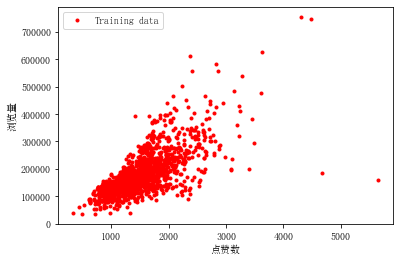

In [5]:
plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='Training data')
plt.xlabel('点赞数')
plt.ylabel('浏览量')
plt.legend()
plt.show()

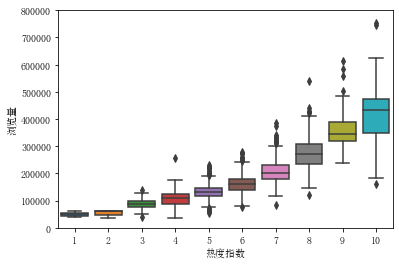

In [6]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [7]:
# 数据清洗
df_ads.isna().sum()
df_ads = df_ads.dropna()

In [8]:
# 构建特征集  标签集
X = df_ads.drop(['浏览量'], axis=1)
Y = df_ads['浏览量']
X.head()

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [9]:
Y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [10]:
# 拆分训练集 验证集和测试集

#将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split #导入train_test_split工具
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                   test_size=0.2, random_state=0)

print(X_train)
print(X_test)

       点赞数     转发数  热度指数  文章评级
673   1620  1620.0     9     5
308   1796   780.0     6     5
554   2358   907.0     6     8
1011  1718   832.0     7     5
833   1266  1266.0     7     5
...    ...     ...   ...   ...
786   1710   832.0     6     5
859   1140  1140.0     5     5
1248  1358  1358.0     7     5
574   2060  1151.0     6     5
705   1224   612.0     6     5

[1138 rows x 4 columns]
       点赞数     转发数  热度指数  文章评级
1074  1709   970.0     6     5
404   1440  1440.0     4     4
1375  1434  1454.0     7     5
1317   832   832.0     6     6
145    923   876.0     5     5
...    ...     ...   ...   ...
420   1790   873.0     7     5
1338  2622  1463.0     8     5
542   1342  1372.0     6     5
311   1663  1364.0     4     6
887   1442  1442.0     6     6

[285 rows x 4 columns]


In [11]:
# 线性回归算法

from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
linereg_model = LinearRegression() # 使用线性回归算法创建模型

linereg_model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定内部参数


LinearRegression()

In [12]:
y_pred = linereg_model.predict(X_test) #预测测试集的Y值

In [13]:
df_ads_pred = X_test.copy() # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred # 测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


In [14]:

print('当前模型的4个特征的权重分别是: ', linereg_model.coef_)
print('当前模型的截距（偏置）是: ', linereg_model.intercept_)

当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857173


In [16]:
# 评分
print("线性回归预测评分：", linereg_model.score(X_test, y_test)) # 评估模型

线性回归预测评分： 0.7405520646115241
